In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('Project_Data_1.csv', thousands=',')
df.rename(columns={'Sales of Wheat in tons':'Country'}, inplace=True)
df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [3]:
df.isna().sum()

Country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
dtype: int64

In [4]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


# Applying Scaling

In [5]:
new=df.iloc[:,1:]

In [6]:
SS = StandardScaler()
scaled_data = SS.fit_transform(new)
df_scaled = pd.DataFrame(scaled_data, columns=new.columns)

In [7]:
df_scaled.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,1.031105,1.016419,1.021968,1.019423,1.009478,0.986291,1.128200,1.074120,1.039774,0.989390,0.846811,0.724331,0.607753,0.627344,0.519470,0.454736,0.389369,0.334118
1,-0.668467,-0.683941,-0.676939,-0.679417,-0.678571,-0.683806,-0.708152,-0.714132,-0.717253,-0.711612,-0.691216,-0.702798,-0.720209,-0.688420,-0.690181,-0.674791,-0.679274,-0.686033
2,-0.655527,-0.666456,-0.663562,-0.674863,-0.673946,-0.688524,-0.702979,-0.714132,-0.706637,-0.691056,-0.651006,-0.629486,-0.632329,-0.597842,-0.580645,-0.560889,-0.541538,-0.525454
3,-0.668467,-0.797590,-0.841925,-0.788726,-0.794190,-0.782879,-0.925410,-0.813190,-0.881809,-0.886337,-0.852056,-0.839646,-0.852029,-0.812369,-0.785429,-0.760217,-0.760016,-0.766323
4,-0.681408,-0.697054,-0.703693,-0.720408,-0.724819,-0.745137,-0.780571,-0.823617,-0.818110,-0.814392,-0.791741,-0.771222,-0.773914,-0.755162,-0.737805,-0.726996,-0.722020,-0.700202


# Applying PCA

In [8]:
pca=PCA(n_components=18)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
tempdf=pca.transform(df_scaled)
df_PCA=pd.DataFrame(tempdf)
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.498735,0.975856,-0.438339,0.015607,0.015259,-0.001354,-0.015872,-0.051491,-0.058917,0.035843,-0.071008,-0.027033,-0.041626,0.030975,-0.014178,0.012249,-0.018485,0.000911
1,-2.936103,0.012171,0.016047,-0.028113,0.001623,-0.001624,-0.020748,0.011241,-0.003015,0.014370,-0.005371,0.001537,-0.003320,-0.002092,0.003611,0.012822,-0.003294,0.001606
2,-2.725665,-0.185039,0.107767,-0.030382,-0.017299,0.009790,0.011283,0.026582,0.004659,0.003932,0.004305,-0.001614,0.003699,0.001391,0.004337,0.000451,0.006393,0.000073
3,-3.445596,0.005623,0.136492,-0.053546,-0.030357,0.014885,-0.006572,-0.025687,-0.037863,-0.017722,0.022019,0.050214,-0.029570,-0.109183,-0.012712,0.030152,0.004549,0.029385
4,-3.181315,0.033922,0.129368,-0.021619,-0.005545,0.021062,0.006737,0.024755,0.000294,0.001433,-0.008787,-0.006367,0.001174,0.004680,-0.003369,-0.006450,-0.002294,-0.002896


In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92039771, 0.97744674, 0.98909134, 0.99162582, 0.9939247 ,
       0.99552435, 0.99675104, 0.99763978, 0.9982948 , 0.99877216,
       0.99910096, 0.99937522, 0.99961408, 0.99975874, 0.99986727,
       0.99993686, 0.99997824, 1.        ])

#### The first 14 components explains almost 99.97 % of Variance in the data
#### But considering all 18 components for further clustering

# ELBOW Chart

In [11]:
res=[]
for each in range(2,10):
    kmeans=KMeans(n_clusters=each)
    kmeans.fit(df_PCA)
    groups=kmeans.labels_
    score=silhouette_score(df_PCA,groups)
    res.append((each,score))

In [12]:
res

[(2, 0.7005740355529827),
 (3, 0.6672924042395231),
 (4, 0.5524425072594178),
 (5, 0.47786420850216177),
 (6, 0.48469649926076497),
 (7, 0.4807264495979806),
 (8, 0.47973074082569084),
 (9, 0.4789464175094853)]

#### Silhouette score is higher for 2 clusters, so considering 2 Clusters.

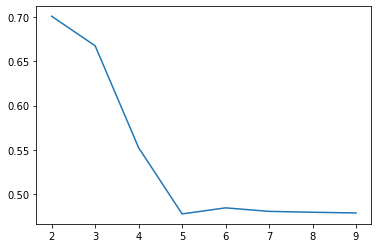

In [13]:
plt.plot(list(zip(*res))[0], list(zip(*res))[1])

# K Means Clustering

In [14]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df_PCA)
groups=kmeans.labels_

In [15]:
df_PCA_KCluster = df_PCA

In [18]:
df_PCA_KCluster['KMeans_Grouping']=groups
df_PCA_KCluster['Country']=df['Country']

In [19]:
df_PCA_KCluster

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,KMeans_Grouping,Country
0,3.498735,0.975856,-0.438339,0.015607,0.015259,-0.001354,-0.015872,-0.051491,-0.058917,0.035843,-0.071008,-0.027033,-0.041626,0.030975,-0.014178,0.012249,-0.018485,0.000911,0,Afghanistan
1,-2.936103,0.012171,0.016047,-0.028113,0.001623,-0.001624,-0.020748,0.011241,-0.003015,0.014370,-0.005371,0.001537,-0.003320,-0.002092,0.003611,0.012822,-0.003294,0.001606,1,Albania
2,-2.725665,-0.185039,0.107767,-0.030382,-0.017299,0.009790,0.011283,0.026582,0.004659,0.003932,0.004305,-0.001614,0.003699,0.001391,0.004337,0.000451,0.006393,0.000073,1,Algeria
3,-3.445596,0.005623,0.136492,-0.053546,-0.030357,0.014885,-0.006572,-0.025687,-0.037863,-0.017722,0.022019,0.050214,-0.029570,-0.109183,-0.012712,0.030152,0.004549,0.029385,1,American Samoa
4,-3.181315,0.033922,0.129368,-0.021619,-0.005545,0.021062,0.006737,0.024755,0.000294,0.001433,-0.008787,-0.006367,0.001174,0.004680,-0.003369,-0.006450,-0.002294,-0.002896,1,Andorra
5,4.707008,1.401696,-0.303977,-0.288797,0.079670,0.073745,-0.143446,0.399667,0.517781,0.586735,-0.104589,0.052408,-0.171342,0.048360,0.012974,-0.057609,-0.088084,-0.006396,0,Angola
6,-2.965974,-0.081328,0.087320,-0.025540,-0.008428,0.010825,-0.000572,0.017431,-0.004398,0.003837,-0.000795,-0.000638,0.003737,0.005345,0.002552,-0.001186,0.002561,0.001502,1,Anguilla
7,-3.472336,-0.042010,0.119091,-0.031311,-0.015879,0.011564,0.000224,0.027213,-0.008268,0.001326,-0.002586,-0.005199,0.003256,0.007529,-0.000221,0.002698,0.003659,-0.000030,1,Antigua and Barbuda
8,-2.453246,0.270218,0.073992,-0.035393,-0.028939,0.028408,0.016126,0.019017,-0.014876,-0.001176,-0.012557,-0.002670,0.006921,0.000068,-0.007010,0.002170,-0.006266,-0.002394,1,Argentina
9,-2.150132,-0.370259,-0.072443,0.004702,0.065463,0.048030,-0.046724,0.054529,0.005171,-0.016711,0.009322,0.013563,-0.024955,-0.000838,-0.004045,0.006731,0.015854,0.000053,1,Armenia


In [20]:
gr = df_PCA_KCluster.groupby('KMeans_Grouping')
gr.get_group(0).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,KMeans_Grouping
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,5.411261,-0.149954,-0.077899,0.001021,0.009408,0.002178,-0.005544,0.004236,-0.001154,0.005302,-0.007464,-0.004654,-0.010400,0.007172,-0.001514,-0.001212,-0.001745,0.000897,0.0
std,2.912160,1.749191,0.784820,0.242917,0.182358,0.250859,0.229010,0.183369,0.149374,0.134436,0.104770,0.089262,0.084170,0.070124,0.052802,0.059813,0.045630,0.022556,0.0
min,1.708889,-3.277195,-1.935819,-0.836184,-0.538904,-0.809989,-0.556194,-0.481441,-0.410390,-0.399845,-0.367609,-0.332847,-0.261254,-0.095021,-0.140903,-0.164966,-0.116977,-0.054511,0.0
25%,3.399272,-1.915093,-0.352342,-0.044951,-0.098804,-0.107956,-0.145463,-0.083453,-0.045715,-0.025674,-0.050443,-0.028517,-0.043688,-0.032464,-0.023003,-0.031687,-0.025334,-0.008472,0.0
50%,4.705386,0.066066,-0.148055,0.029850,0.012686,-0.001371,0.002319,-0.009083,-0.005945,0.010583,-0.019047,-0.009247,-0.005898,-0.007339,-0.007548,-0.009695,-0.001933,0.000576,0.0
75%,6.824445,1.005096,0.130890,0.117584,0.110581,0.084097,0.115629,0.068113,0.055506,0.039517,0.057770,0.016216,0.021857,0.031474,0.017473,0.014286,0.014929,0.008630,0.0
max,17.601966,4.086815,4.499345,0.747637,0.426357,1.013464,0.704098,0.803869,0.517781,0.586735,0.270058,0.259609,0.169675,0.270139,0.164012,0.269893,0.179891,0.071406,0.0


In [21]:
gr.get_group(1).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,KMeans_Grouping
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0
mean,-2.421823,0.067112,0.034864,-0.000457,-0.004211,-0.000975,0.002481,-0.001896,0.000517,-0.002373,0.003341,0.002083,0.004655,-0.003210,0.000678,0.000542,0.000781,-0.000401,1.0
std,1.133237,0.353278,0.168281,0.200805,0.213330,0.118538,0.094336,0.091600,0.085365,0.067000,0.061001,0.060394,0.055261,0.039758,0.040115,0.015417,0.012651,0.018568,0.0
min,-3.641519,-1.471957,-0.944494,-0.931279,-1.131772,-0.891933,-0.692734,-0.524179,-0.368047,-0.523067,-0.182455,-0.272373,-0.246069,-0.216696,-0.126837,-0.067287,-0.079631,-0.089739,1.0
25%,-3.367246,-0.064901,0.019847,-0.031065,-0.027359,-0.005173,-0.011032,-0.003133,-0.012165,-0.005712,-0.007691,-0.010809,-0.004925,-0.008199,-0.006877,-0.003333,-0.002648,-0.002868,1.0
50%,-2.763412,-0.006741,0.090612,-0.025732,-0.008064,0.014275,-0.001810,0.020513,-0.005272,0.003117,-0.002007,-0.001236,0.001548,0.003528,0.001509,0.001834,0.000992,-0.000796,1.0
75%,-1.861845,0.229348,0.113136,-0.009252,0.000525,0.026117,0.013868,0.028422,0.000827,0.007525,0.004422,0.003030,0.004678,0.007257,0.004886,0.004461,0.003946,0.002215,1.0
max,1.315624,1.255578,0.446197,1.821380,1.578753,0.316138,0.498586,0.145592,0.610725,0.494456,0.575143,0.389965,0.405345,0.172284,0.330989,0.054787,0.030334,0.125646,1.0


# Group 0 having 64 countries is the largest importers of the goods than Group 1 having 143 countries as per above K Means Clustering

In [22]:
df_PCA.drop(columns=['KMeans_Grouping', 'Country'], axis=1, inplace=True)

In [23]:
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.498735,0.975856,-0.438339,0.015607,0.015259,-0.001354,-0.015872,-0.051491,-0.058917,0.035843,-0.071008,-0.027033,-0.041626,0.030975,-0.014178,0.012249,-0.018485,0.000911
1,-2.936103,0.012171,0.016047,-0.028113,0.001623,-0.001624,-0.020748,0.011241,-0.003015,0.014370,-0.005371,0.001537,-0.003320,-0.002092,0.003611,0.012822,-0.003294,0.001606
2,-2.725665,-0.185039,0.107767,-0.030382,-0.017299,0.009790,0.011283,0.026582,0.004659,0.003932,0.004305,-0.001614,0.003699,0.001391,0.004337,0.000451,0.006393,0.000073
3,-3.445596,0.005623,0.136492,-0.053546,-0.030357,0.014885,-0.006572,-0.025687,-0.037863,-0.017722,0.022019,0.050214,-0.029570,-0.109183,-0.012712,0.030152,0.004549,0.029385
4,-3.181315,0.033922,0.129368,-0.021619,-0.005545,0.021062,0.006737,0.024755,0.000294,0.001433,-0.008787,-0.006367,0.001174,0.004680,-0.003369,-0.006450,-0.002294,-0.002896


# Agglomerative Hierarchial Clustering

In [24]:
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
group = cluster.fit_predict(df_PCA)
group

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [25]:
df_PCA['Hierarchial_Grouping']=group
df_PCA['Country']=df['Country']

In [26]:
gr = df_PCA.groupby('Hierarchial_Grouping')
gr.get_group(0).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Hierarchial_Grouping
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0
mean,5.285235,-0.113885,-0.075727,0.001715,0.005880,0.004237,-0.002143,0.003702,-0.002096,0.005969,-0.008282,-0.004455,-0.011448,0.006327,-0.001519,-0.001155,-0.001890,0.000933,0.0
std,2.955659,1.734711,0.772860,0.239184,0.180853,0.248495,0.226310,0.180647,0.147518,0.132415,0.103669,0.087887,0.083133,0.069381,0.051983,0.058927,0.045073,0.022218,0.0
min,1.189187,-3.277195,-1.935819,-0.836184,-0.538904,-0.809989,-0.556194,-0.481441,-0.410390,-0.399845,-0.367609,-0.332847,-0.261254,-0.095021,-0.140903,-0.164966,-0.116977,-0.054511,0.0
25%,3.250734,-1.820852,-0.342395,-0.038725,-0.103125,-0.100845,-0.141098,-0.080027,-0.046175,-0.025423,-0.054675,-0.026852,-0.047813,-0.033932,-0.021319,-0.031547,-0.025830,-0.007673,0.0
50%,4.673582,0.077778,-0.143841,0.026994,0.006826,-0.001371,0.008214,-0.009083,-0.005945,0.012474,-0.019047,-0.006233,-0.007242,-0.007339,-0.006157,-0.009695,-0.001933,0.000576,0.0
75%,6.772785,1.063578,0.129613,0.115291,0.105325,0.084758,0.115851,0.064505,0.053202,0.038171,0.050898,0.013821,0.021154,0.031216,0.017152,0.013648,0.014666,0.008116,0.0
max,17.601966,4.086815,4.499345,0.747637,0.426357,1.013464,0.704098,0.803869,0.517781,0.586735,0.270058,0.259609,0.169675,0.270139,0.164012,0.269893,0.179891,0.071406,0.0


In [27]:
gr.get_group(1).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Hierarchial_Grouping
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0
mean,-2.473940,0.053308,0.035447,-0.000803,-0.002752,-0.001983,0.001003,-0.001733,0.000981,-0.002794,0.003877,0.002086,0.005359,-0.002962,0.000711,0.000541,0.000885,-0.000437,1.0
std,1.052104,0.334968,0.169175,0.202213,0.214414,0.117863,0.094156,0.092154,0.085594,0.067375,0.060938,0.060823,0.055296,0.039844,0.040400,0.015456,0.012474,0.018692,0.0
min,-3.641519,-1.471957,-0.944494,-0.931279,-1.131772,-0.891933,-0.692734,-0.524179,-0.368047,-0.523067,-0.182455,-0.272373,-0.246069,-0.216696,-0.126837,-0.067287,-0.079631,-0.089739,1.0
25%,-3.372353,-0.065502,0.021784,-0.031126,-0.026696,-0.004966,-0.011360,-0.003058,-0.012051,-0.006084,-0.007563,-0.011372,-0.004674,-0.007467,-0.007010,-0.003281,-0.002591,-0.002896,1.0
50%,-2.765490,-0.012484,0.092836,-0.025800,-0.008038,0.014275,-0.001942,0.020652,-0.005272,0.003081,-0.002007,-0.001236,0.001578,0.003528,0.001676,0.001834,0.000992,-0.000796,1.0
75%,-1.906021,0.193472,0.113343,-0.012515,0.000544,0.025834,0.012055,0.028560,0.000717,0.006794,0.004310,0.003005,0.004751,0.007235,0.004925,0.004415,0.003845,0.002186,1.0
max,0.606745,1.129257,0.446197,1.821380,1.578753,0.316138,0.498586,0.145592,0.610725,0.494456,0.575143,0.389965,0.405345,0.172284,0.330989,0.054787,0.030334,0.125646,1.0


# Group 0 having 66 countries is the largest importers of the goods than Group 1 having 141 countries as per above Agglomerative Hierarchial Clustering.

In [28]:
df_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Hierarchial_Grouping,Country
0,3.498735,0.975856,-0.438339,0.015607,0.015259,-0.001354,-0.015872,-0.051491,-0.058917,0.035843,-0.071008,-0.027033,-0.041626,0.030975,-0.014178,0.012249,-0.018485,0.000911,0,Afghanistan
1,-2.936103,0.012171,0.016047,-0.028113,0.001623,-0.001624,-0.020748,0.011241,-0.003015,0.014370,-0.005371,0.001537,-0.003320,-0.002092,0.003611,0.012822,-0.003294,0.001606,1,Albania
2,-2.725665,-0.185039,0.107767,-0.030382,-0.017299,0.009790,0.011283,0.026582,0.004659,0.003932,0.004305,-0.001614,0.003699,0.001391,0.004337,0.000451,0.006393,0.000073,1,Algeria
3,-3.445596,0.005623,0.136492,-0.053546,-0.030357,0.014885,-0.006572,-0.025687,-0.037863,-0.017722,0.022019,0.050214,-0.029570,-0.109183,-0.012712,0.030152,0.004549,0.029385,1,American Samoa
4,-3.181315,0.033922,0.129368,-0.021619,-0.005545,0.021062,0.006737,0.024755,0.000294,0.001433,-0.008787,-0.006367,0.001174,0.004680,-0.003369,-0.006450,-0.002294,-0.002896,1,Andorra
5,4.707008,1.401696,-0.303977,-0.288797,0.079670,0.073745,-0.143446,0.399667,0.517781,0.586735,-0.104589,0.052408,-0.171342,0.048360,0.012974,-0.057609,-0.088084,-0.006396,0,Angola
6,-2.965974,-0.081328,0.087320,-0.025540,-0.008428,0.010825,-0.000572,0.017431,-0.004398,0.003837,-0.000795,-0.000638,0.003737,0.005345,0.002552,-0.001186,0.002561,0.001502,1,Anguilla
7,-3.472336,-0.042010,0.119091,-0.031311,-0.015879,0.011564,0.000224,0.027213,-0.008268,0.001326,-0.002586,-0.005199,0.003256,0.007529,-0.000221,0.002698,0.003659,-0.000030,1,Antigua and Barbuda
8,-2.453246,0.270218,0.073992,-0.035393,-0.028939,0.028408,0.016126,0.019017,-0.014876,-0.001176,-0.012557,-0.002670,0.006921,0.000068,-0.007010,0.002170,-0.006266,-0.002394,1,Argentina
9,-2.150132,-0.370259,-0.072443,0.004702,0.065463,0.048030,-0.046724,0.054529,0.005171,-0.016711,0.009322,0.013563,-0.024955,-0.000838,-0.004045,0.006731,0.015854,0.000053,1,Armenia
